## Compute the voltage of LiFePO4

In [1]:
%load_ext aiida
%aiida

Loaded AiiDA DB environment - profile name: ucl.

In [2]:
q = QueryBuilder()
q.append(WorkflowFactory('vaspu.relax'), filters={'label': {'like': '%LFP%Pnma%'}}, project=['label', 'uuid'])
q.all()

[['LFP Pnma AFM ISYM=0', '08c01924-e1fc-478b-9920-c52ae391b7af'],
 ['LFP Pnma AFM', '692cb240-591d-479d-8311-664ebbebd69c'],
 ['LFP Pnma AFM', 'c24eec9d-2f80-4e25-a602-ef99341549ae']]

In [3]:
lfp_structure = load_node('692cb240').inputs.structure

In [174]:
lfp_structure.get_ase()

Atoms(symbols='Li4Fe4P4O16', pbc=True, cell=[[-3.2e-05, -3e-05, 4.746441], [10.44373, 0.000249, -6.8e-05], [0.000145, 6.090226, -3.7e-05]], masses=...)

In [4]:
from aiida_user_addons.vworkflows.relax import VaspRelaxWorkChain
from aiida_user_addons.common.builder_updater import VaspRelaxUpdater
from aiida_user_addons.tools.dryrun import dryrun_relax_builder

from aiida_grouppathx import GroupPathX

from aiida.engine import submit

In [5]:
base = GroupPathX('lfp-demo')

In [6]:
config = {
    'code': 'vasp-6.3.0-std@young',
    'inputset': 'UCLRelaxSet',
    'overrides': {'encut': 520, 'magmom_mapping': {'Fe': 4.0, 'default': 0.6}, 'ldauu_mapping' : {'Fe': ['d', 4.0]}, 'kpar': 8, 'ncore': 5, 'symprec': 1e-8},
    'options':{
        'max_wallclock_seconds': 3600 * 2,
        'custom_scheduler_commands': '#$ -P Gold\n#$ -A UCL_ChemM_Scanlon',
        'resources': {'parallel_env': 'mpi', 'tot_num_mpiprocs': 80}
    }
}
upd = VaspRelaxUpdater.init_from_config(lfp_structure, config)
upd.set_label("LFP PBEsol RELAX")

Using input set file at: /home/bonan/aiida_envs/aiida-2.0/aiida-user-addons/aiida_user_addons/common/inputset/UCLRelaxSet.yaml


In [7]:
upd.builder

Process class: VaspRelaxWorkChain
Inputs:
metadata:
  label: LFP PBEsol RELAX
relax_settings:
  algo: cg
  clean_reuse: true
  convergence_absolute: false
  convergence_max_iterations: 5
  convergence_mode: last
  convergence_on: true
  convergence_positions: 0.1
  convergence_shape_angles: 0.1
  convergence_shape_lengths: 0.1
  convergence_volume: 0.01
  force_cutoff: 0.03
  keep_magnetization: false
  keep_sp_workdir: false
  perform: true
  positions: true
  reuse: false
  shape: true
  steps: 60
  volume: true
structure: FeLiO4P
vasp:
  code: VASP 6.3.0 compiled by UCL on Young
  dynamics: {}
  kpoints_spacing: 0.05
  metadata: {}
  options:
    custom_scheduler_commands: '#$ -P Gold

      #$ -A UCL_ChemM_Scanlon'
    import_sys_environment: false
    max_wallclock_seconds: 7200
    resources:
      parallel_env: mpi
      tot_num_mpiprocs: 80
  parameters:
    incar:
      algo: normal
      ediff: 2.8e-05
      encut: 520
      gga: ps
      ismear: 0
      ispin: 2
      kpar: 

In [8]:
work = submit(upd.builder)

In [15]:
work.outputs.misc.get_dict()

{'version': '6.3.0',
 'run_stats': {'user_time': 96.474,
  'system_time': 2.885,
  'elapsed_time': 101.342,
  'mem_usage_base': 30000.0,
  'mem_usage_grid': 14479.0,
  'mem_usage_wavefun': 71584.0,
  'mem_usage_fftplans': 5002.0,
  'average_memory_used': None,
  'maximum_memory_used': 315380.0,
  'mem_usage_nonl-proj': 20440.0,
  'total_cpu_time_used': 99.359,
  'mem_usage_one-center': 186.0},
 'run_status': {'nsw': 0,
  'nelm': 200,
  'nbands': 126,
  'finished': True,
  'ionic_converged': None,
  'contains_nelm_breach': False,
  'electronic_converged': True,
  'last_iteration_index': [1, 30],
  'consistent_nelm_breach': False},
 'maximum_force': 0.026113014697156,
 'notifications': [],
 'maximum_stress': 1.7068389634157,
 'total_energies': {'energy_extrapolated': -200.63203013,
  'energy_extrapolated_electronic': -200.63203013}}

## For delithiated 

In [9]:
from aiida_user_addons.process.transform import make_vac

##### Make a vacancy

In [10]:
lfp_vac = make_vac(lfp_structure, List([0, 1,2,3]), List([1,1,1]))

10/19/2022 02:35:13 PM <13549> aiida.orm.nodes.process.calculation.calcfunction.CalcFunctionNode: [INFO] Process<739360>: Broadcasting state change: state_changed.created.running
10/19/2022 02:35:13 PM <13549> aiida.orm.nodes.process.calculation.calcfunction.CalcFunctionNode: [INFO] Process<739360>: Broadcasting state change: state_changed.running.finished


In [11]:
lfp_vac.get_pymatgen()

Structure Summary
Lattice
    abc : 4.746441000202679 10.443730003189714 6.090226001838521
 angles : 89.99726981392239 90.00071023813499 90.00075934829582
 volume : 301.8958416811171
      A : -3.2e-05 -3e-05 4.746441
      B : 10.44373 0.000249 -6.8e-05
      C : 0.000145 6.090226 -3.7e-05
PeriodicSite: Fe (2.2772, 4.5677, 2.2557) [0.4752, 0.2180, 0.7500]
PeriodicSite: Fe (7.4991, 4.5679, 0.1174) [0.0248, 0.7180, 0.7500]
PeriodicSite: Fe (2.9441, 1.5226, 4.6282) [0.9751, 0.2819, 0.2500]
PeriodicSite: Fe (8.1660, 1.5227, 2.4914) [0.5249, 0.7819, 0.2500]
PeriodicSite: O (1.0103, 1.5226, 3.5212) [0.7419, 0.0967, 0.2500]
PeriodicSite: O (4.2114, 4.5677, 1.1482) [0.2419, 0.4032, 0.7500]
PeriodicSite: O (6.2321, 1.5227, 3.5984) [0.7581, 0.5967, 0.2500]
PeriodicSite: O (9.4332, 4.5679, 1.2248) [0.2581, 0.9032, 0.7500]
PeriodicSite: O (4.7736, 1.5227, 0.9822) [0.2069, 0.4571, 0.2500]
PeriodicSite: O (0.4485, 4.5677, 3.3549) [0.7068, 0.0429, 0.7500]
PeriodicSite: O (9.9955, 1.5228, 1.3909) [0.

In [12]:
config = {
    'code': 'vasp-6.3.0-std@young',
    'inputset': 'UCLRelaxSet',
    'overrides': {'encut': 520, 'magmom_mapping': {'Fe': 4.0, 'default': 0.6}, 'ldauu_mapping' : {'Fe': ['d', 4.0]}, 'kpar': 8, 'ncore': 5, 'symprec': 1e-8},
    'options':{
        'max_wallclock_seconds': 3600 * 2,
        'custom_scheduler_commands': '#$ -P Gold\n#$ -A UCL_ChemM_Scanlon',
        'resources': {'parallel_env': 'mpi', 'tot_num_mpiprocs': 80}
    }
}
upd = VaspRelaxUpdater.init_from_config(lfp_vac, config)
upd.set_label("LFP DELI PBEsol RELAX")

Using input set file at: /home/bonan/aiida_envs/aiida-2.0/aiida-user-addons/aiida_user_addons/common/inputset/UCLRelaxSet.yaml


In [13]:
work_deli = submit(upd.builder)

In [195]:
work_deli.outputs.misc.get_dict()

{'version': '6.3.0',
 'run_stats': {'user_time': 64.788,
  'system_time': 3.0,
  'elapsed_time': 68.965,
  'mem_usage_base': 30000.0,
  'mem_usage_grid': 13475.0,
  'mem_usage_wavefun': 90484.0,
  'mem_usage_fftplans': 4999.0,
  'average_memory_used': None,
  'maximum_memory_used': 329516.0,
  'mem_usage_nonl-proj': 20608.0,
  'total_cpu_time_used': 67.789,
  'mem_usage_one-center': 155.0},
 'run_status': {'nsw': 0,
  'nelm': 200,
  'nbands': 118,
  'finished': True,
  'ionic_converged': None,
  'contains_nelm_breach': False,
  'electronic_converged': True,
  'last_iteration_index': [1, 16],
  'consistent_nelm_breach': False},
 'maximum_force': 0.019796825661891,
 'notifications': [],
 'maximum_stress': 0.68246348452411,
 'total_energies': {'energy_extrapolated': -179.67328591,
  'energy_extrapolated_electronic': -179.67328591}}

In [20]:
work_deli

<WorkChainNode: uuid: 470a4cbd-cbd9-4934-81cd-31b8517b33cf (pk: 739371) (aiida.workflows:vaspu.relax)>

In [21]:
base.show_tree()

lfp-demo
├── lfp_band *
├── lfp_conv *
├── lfp_deli_relaxation *
├── lfp_relaxation *
└── lfp_structure *



In [22]:
base.browse.lfp_relaxation().get_node().process_state

<ProcessState.FINISHED: 'finished'>

### Locate the Li-metal reference calculation

In [23]:
q = QueryBuilder()
q.append(Group, filters={'label':'li-metal-refs'})
q.append(Node, with_group=Group, project=['*', 'label'])
q.append(Dict, with_outgoing=Node, filters={'attributes.vasp.gga': 'ps', 'attributes.vasp.encut': 520})
q.append(Dict, with_incoming=Node, project=['attributes.total_energies'])
q.all()

[[<WorkChainNode: uuid: f8cce67a-0eea-4ea8-aecb-2131498e9b1e (pk: 138791) (aiida.workflows:vaspu.relax)>,
  'Li REF 520 ps',
  {'energy_no_entropy': -1.96559223}],
 [<WorkChainNode: uuid: f8cce67a-0eea-4ea8-aecb-2131498e9b1e (pk: 138791) (aiida.workflows:vaspu.relax)>,
  'Li REF 520 ps',
  {'energy_no_entropy': -1.96559223}]]

### Compute Voltage

In [24]:
from aiida_user_addons.process.battery import compute_li_voltage_shortcut

In [25]:
voltage = compute_li_voltage_shortcut(
    base.browse.lfp_relaxation().get_node(),
    base.browse.lfp_deli_relaxation().get_node(),
    load_node('f8cce67a-0eea-4ea8-aecb-2131498e9b1e'),
)

10/19/2022 03:50:30 PM <13549> aiida.orm.nodes.process.calculation.calcfunction.CalcFunctionNode: [INFO] Process<739600>: Broadcasting state change: state_changed.created.running
10/19/2022 03:50:30 PM <13549> aiida.orm.nodes.process.calculation.calcfunction.CalcFunctionNode: [INFO] Process<739600>: Broadcasting state change: state_changed.running.finished


In [27]:
voltage = load_node('15eb01f3')

## Effect of restart 

Variable cell relaxation require multiple restarts...

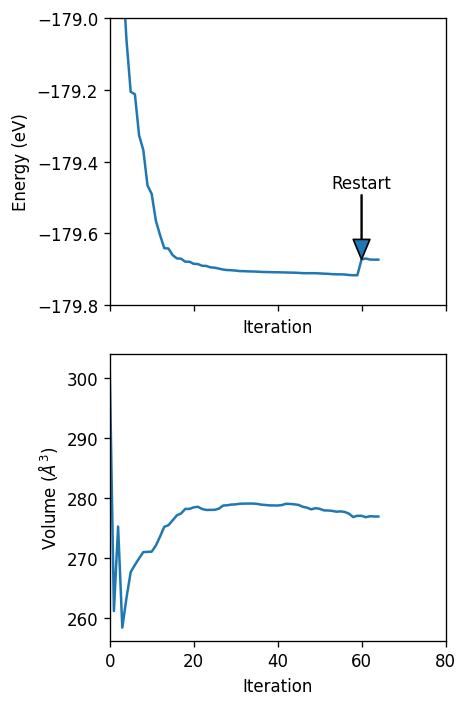

In [29]:
from aiida_user_addons.tools.relax_analyser import RelaxationAnalyser

work = base['lfp_deli_relaxation'].get_node()

ana = RelaxationAnalyser(base['lfp_deli_relaxation'].get_node())

final_e = work.outputs.misc['total_energies']['energy_extrapolated']

fig, axs = plt.subplots(2, 1, figsize=(4,6), dpi=120, sharex=True)
plt.sca(axs[0])
plt.plot(ana.energies)
plt.xlabel('Iteration')
plt.ylabel('Energy (eV)')
#plt.vlines(60, ana.energies[60], ana.energies[60]+ 10, linestyles='dashed', color='k')
plt.ylim(-179.8, -179)
plt.xlim(0, 80)
plt.annotate('Restart', (60, ana.energies[60]),  (60, ana.energies[60] + 0.2),arrowprops={'width': 0.4, 'headwidth': 10}, ha='center')

plt.sca(axs[1])
#plt.figure(figsize=(4,4), dpi=120)
plt.plot([x.get_volume() for x in ana.trajectory])
plt.xlabel('Iteration')
plt.ylabel(r'Volume $(\AA^3)$')
plt.tight_layout()

## Provenance of the relaxation

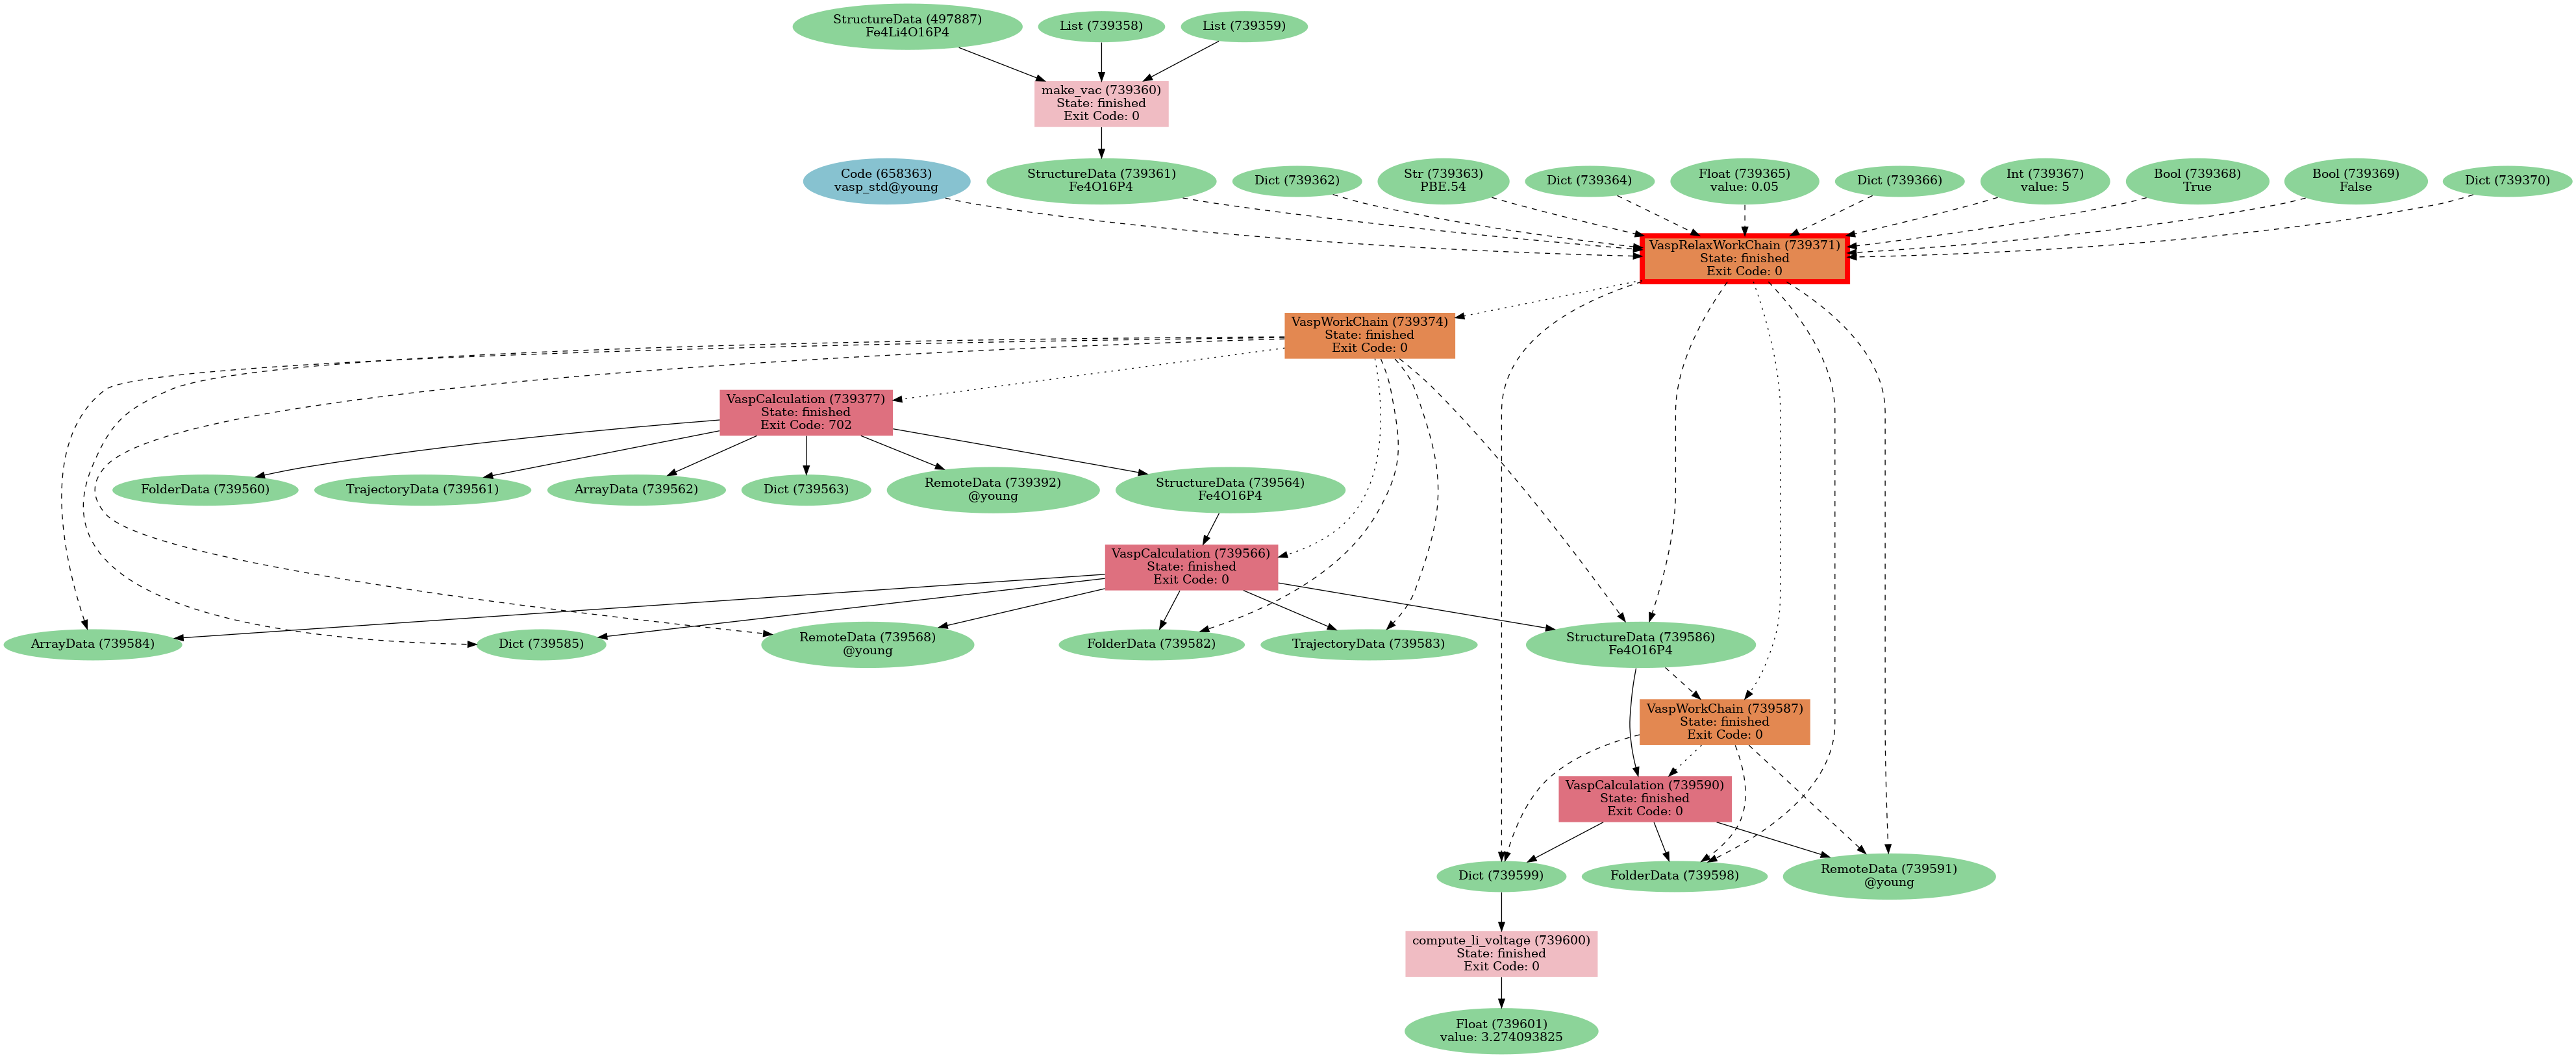

In [30]:
from aiida.tools.visualization import Graph
work = base.browse.lfp_deli_relaxation().get_node()
graph = Graph()
# Add all ancestors and childrens
graph.recurse_ancestors(origin=work)
graph.recurse_descendants(origin=work)
graph.graphviz.render('lfp-deli', format='png')  # Saves to the disk, alternatively `graph.graphviz` is sufficient
graph.graphviz.render('lfp-deli', format='pdf')  # Saves to the disk, alternatively `graph.graphviz` is sufficient

from IPython.display import Image
Image("lfp-deli.png")

### Provenance for voltage

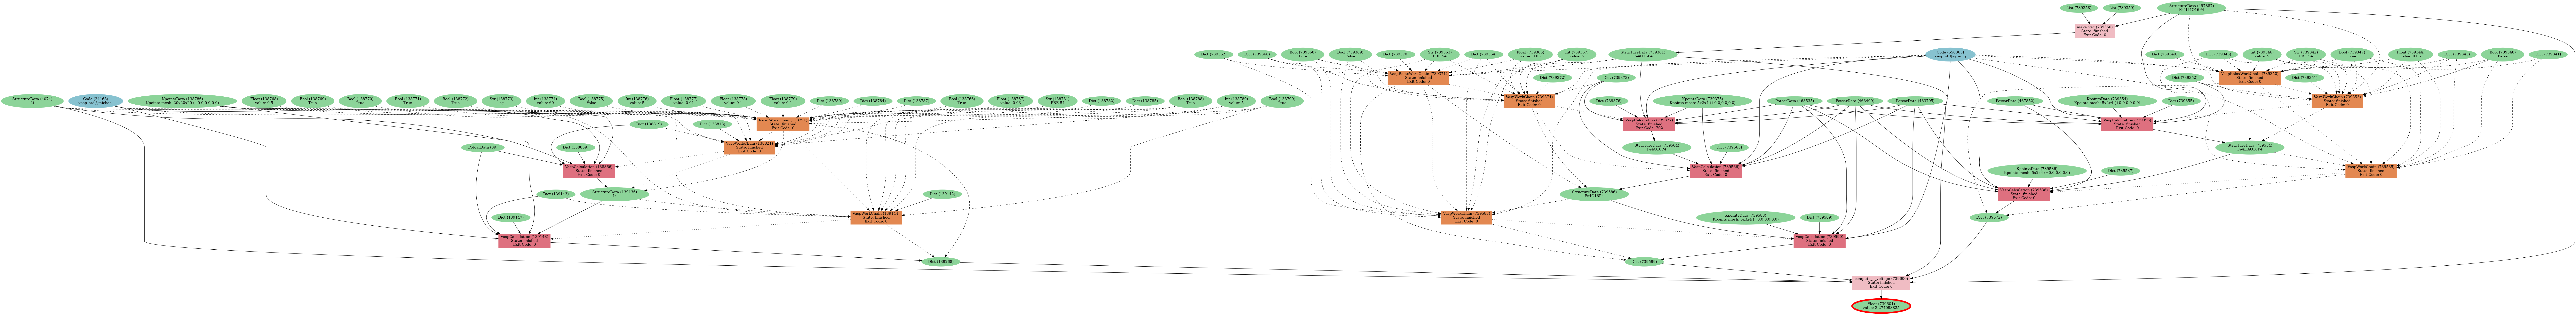

In [31]:
from aiida.tools.visualization import Graph
work = base.browse.lfp_deli_relaxation().get_node()
graph = Graph()
# Add all ancestors and childrens
graph.recurse_ancestors(origin=voltage)
graph.recurse_descendants(origin=voltage)
graph.graphviz.render('lfp-deli-voltage', format='png')  # Saves to the disk, alternatively `graph.graphviz` is sufficient
graph.graphviz.render('lfp-deli-voltage', format='pdf')  # Saves to the disk, alternatively `graph.graphviz` is sufficient

from IPython.display import Image
Image("lfp-deli-voltage.png")